In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os
from matplotlib.colors import LinearSegmentedColormap
import calendar
from matplotlib import dates
import matplotlib.ticker as ticker
import matplotlib.collections as collections
import matplotlib.patches as mpatches


%matplotlib inline  


import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')


# Diagrama de Bonecos

In [2]:
def cmap_bann(n_bin):   
    #lista_cores = ['#F0F00F','#FFFFFF']   
    #n_bin = 20   
    lista_cores = sns.color_palette('tab20', n_colors=n_bin)
    cmap_name = 'cmap_bann'
    cmap = LinearSegmentedColormap.from_list(cmap_name, lista_cores, N=n_bin)

    return cmap

In [3]:
def xy_df(df,index):
    x = df.index.get_loc(index)
    
    linha = df.loc[index]
    primeira_coluna = linha.index[linha.notna()].min()
    lista = list(df.columns)
    y = lista.index(primeira_coluna)
    
    return y +.5, x+.5

def desenha_flexa(ax, origem,destino,label=None):

    connectionstyle = "angle,angleA=-90,angleB=180,rad=5"
    
    if label is None:
        label = ''

    if origem == '':
        x2, y2 = xy_df(df,destino)
        x2 = x2 + 1
        y2 = y2
    else:
        x2, y2 = xy_df(df,origem)
    
    if destino == '':
        x1 = x2 - 1
        y1 = y2
        
    else:
        x1, y1 = xy_df(df,destino)
        


    ax.plot([x1, x2], [y1, y2], ".",color='k')
    ax.annotate('',
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.3",
                                facecolor = 'red',
                                shrinkA=3, shrinkB=10,
                                patchA=None,
                                patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )
    ax.annotate(label, xy=(x1, y1-0.5), xytext=(x1+1, y1-0.5), color='black', fontsize=8)

In [4]:
df = pd.read_excel(r'C:\Users\cs64280\OneDrive - Companhia Siderurgica Nacional\CTM\Equipe\Diagrama de Bonecos.xlsx',sheet_name='Planilha2')

aux = 0
dic_cor = {}
for i in df['Nucleo'].unique():
    dic_cor[i] = aux
    aux += 1

df['Nucleo'] = df['Nucleo'].replace(dic_cor)

df  = pd.pivot_table(df, values='Nucleo', index='Nome',columns=['Cargo'], aggfunc='mean')

df = df[['Coord','E','E2','E1','AT2','Analista Pl','Analista Jr','TDE','TD2','TD1','TMM','TPC','Auxiliar','Estagiário']]
df = df.sort_values(by=['Coord','E','E2','E1','AT2','Analista Pl','Analista Jr','TDE','TD2','TD1','TMM','TPC','Auxiliar','Estagiário'])



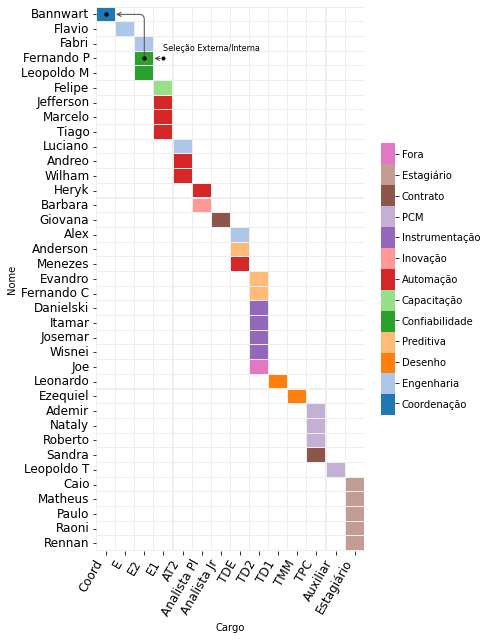

In [5]:
fig, ax = plt.subplots(figsize=(6,10))
axx = sns.heatmap(df,          
            linewidths=.1,
            linecolor='#EEEEEE',
            ax=ax,
            fmt='.0f',
            cbar = True,
            annot=False,
            annot_kws={"fontsize":8},
            cmap=cmap_bann(aux),
            yticklabels=True,
            xticklabels=True,
            cbar_kws={"shrink": 0.5})

ax.set_xticklabels(ax.get_xticklabels(),rotation=60, ha='right', fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)

c_bar = axx.collections[0].colorbar
lista = np.linspace(0.5, 11.5, 13)
c_bar.set_ticks(lista)
c_bar.set_ticklabels(list(dic_cor.keys()))

desenha_flexa(ax, 'Bannwart', '','')

desenha_flexa(ax, 'Fernando P', 'Bannwart')
desenha_flexa(ax, '', 'Fernando P','Seleção Externa/Interna')



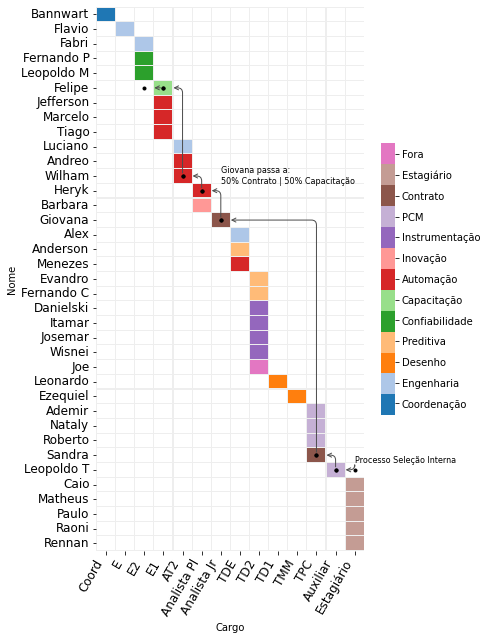

In [6]:
fig, ax = plt.subplots(figsize=(6,10))
axx = sns.heatmap(df,          
            linewidths=.1,
            linecolor='#EEEEEE',
            ax=ax,
            fmt='.0f',
            cbar = True,
            annot=False,
            annot_kws={"fontsize":8},
            cmap=cmap_bann(aux),
            yticklabels=True,
            xticklabels=True,
            cbar_kws={"shrink": 0.5})

ax.set_xticklabels(ax.get_xticklabels(),rotation=60, ha='right', fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)

c_bar = axx.collections[0].colorbar
lista = np.linspace(0.5, 11.5, 13)
c_bar.set_ticks(lista)
c_bar.set_ticklabels(list(dic_cor.keys()))

desenha_flexa(ax, 'Felipe', '','')

desenha_flexa(ax, 'Wilham','Felipe')
desenha_flexa(ax, 'Heryk','Wilham')
desenha_flexa(ax, 'Giovana','Heryk','Giovana passa a:\n50% Contrato | 50% Capacitação')
desenha_flexa(ax, 'Sandra','Giovana')

desenha_flexa(ax, 'Leopoldo T','Sandra')

desenha_flexa(ax, '', 'Leopoldo T','Processo Seleção Interna')

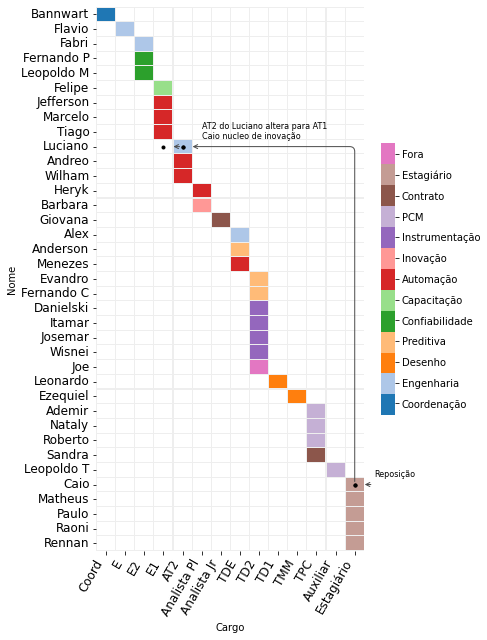

In [7]:
fig, ax = plt.subplots(figsize=(6,10))
axx = sns.heatmap(df,          
            linewidths=.1,
            linecolor='#EEEEEE',
            ax=ax,
            fmt='.0f',
            cbar = True,
            annot=False,
            annot_kws={"fontsize":8},
            cmap=cmap_bann(aux),
            yticklabels=True,
            xticklabels=True,
            cbar_kws={"shrink": 0.5})

ax.set_xticklabels(ax.get_xticklabels(),rotation=60, ha='right', fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)

c_bar = axx.collections[0].colorbar
lista = np.linspace(0.5, 11.5, 13)
c_bar.set_ticks(lista)
c_bar.set_ticklabels(list(dic_cor.keys()))

desenha_flexa(ax, 'Luciano', '','')

desenha_flexa(ax, 'Caio','Luciano','AT2 do Luciano altera para AT1\nCaio nucleo de inovação')

desenha_flexa(ax, '', 'Caio','Reposição')

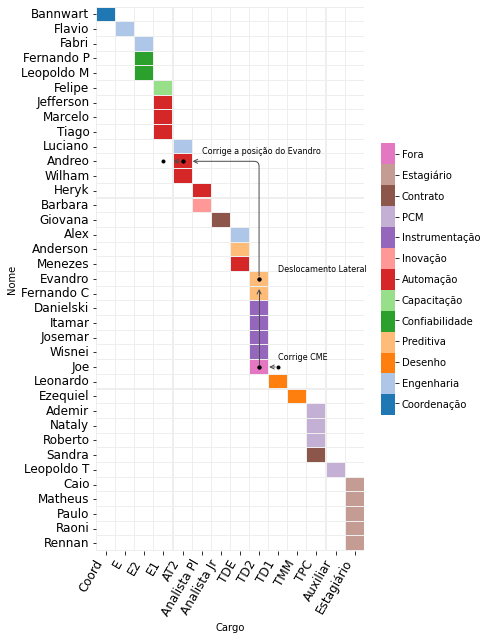

In [8]:
fig, ax = plt.subplots(figsize=(6,10))
axx = sns.heatmap(df,          
            linewidths=.1,
            linecolor='#EEEEEE',
            ax=ax,
            fmt='.0f',
            cbar = True,
            annot=False,
            annot_kws={"fontsize":8},
            cmap=cmap_bann(aux),
            yticklabels=True,
            xticklabels=True,
            cbar_kws={"shrink": 0.5})

ax.set_xticklabels(ax.get_xticklabels(),rotation=60, ha='right', fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)

c_bar = axx.collections[0].colorbar
lista = np.linspace(0.5, 11.5, 13)
c_bar.set_ticks(lista)
c_bar.set_ticklabels(list(dic_cor.keys()))

desenha_flexa(ax, 'Andreo','')

desenha_flexa(ax, 'Evandro','Andreo','Corrige a posição do Evandro')
desenha_flexa(ax, 'Joe','Evandro','Deslocamento Lateral')
desenha_flexa(ax, '','Joe','Corrige CME')